# 다중클래스분류_callback사용해_과적합_막고_최고성능모델_저장하기

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [17]:
data = pd.read_csv("./data/winequality-white.csv", sep=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: >

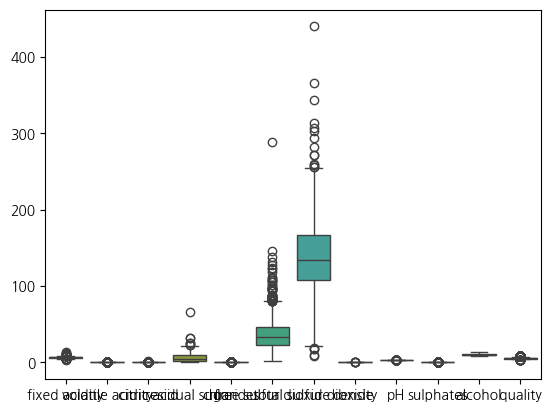

In [19]:
sns.boxplot(data)

In [20]:
data['quality'].value_counts() 

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [22]:
X = data.drop('quality', axis=1)
y = data['quality']

In [23]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [24]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [25]:
y = pd.get_dummies(y)
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [26]:
data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [28]:
y_valid

,3,4,5,6,7,8,9
733,False,False,False,True,False,False,False
1958,False,False,False,True,False,False,False
2706,False,False,False,True,False,False,False
1246,False,False,False,False,True,False,False
1899,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
987,False,False,False,True,False,False,False
4268,False,False,False,True,False,False,False
3616,False,False,True,False,False,False,False
3397,False,False,False,True,False,False,False


In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=42)

In [30]:
rs = RobustScaler()
train_temp = rs.fit_transform(X_train)
valid_temp = rs.transform(X_valid)
test_temp = rs.transform(X_test)
rs_X_train = pd.DataFrame(train_temp, columns=X_train.columns, index= X_train.index)
rs_X_valid = pd.DataFrame(valid_temp, columns=X_valid.columns, index= X_valid.index)
rs_X_test = pd.DataFrame(test_temp, columns=X_test.columns, index= X_test.index)

In [31]:
rs_X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3940,0.090909,1.272727,0.416667,0.451220,0.714286,0.090909,0.216667,0.507205,-0.05,0.142857,-0.578947
3905,-0.272727,0.636364,-0.166667,-0.170732,-0.500000,0.000000,-0.783333,-0.811527,0.40,1.071429,1.105263
53,-0.363636,-0.727273,0.250000,-0.512195,0.142857,0.227273,-0.450000,-0.622478,0.70,-0.928571,0.263158
2576,-0.272727,0.090909,0.666667,0.585366,-0.285714,1.818182,1.533333,0.465706,0.05,0.142857,-0.526316
1970,1.363636,2.090909,0.916667,-0.329268,-0.500000,-0.090909,-0.316667,0.138329,0.30,-0.071429,0.157895
...,...,...,...,...,...,...,...,...,...,...,...
2609,0.272727,-0.545455,-0.166667,-0.524390,-1.714286,-1.363636,-1.783333,-1.035159,0.15,-0.857143,0.842105
2530,-0.909091,0.363636,-1.666667,-0.439024,-0.500000,1.045455,0.466667,-0.325072,1.05,0.785714,0.052632
1231,1.000000,1.363636,0.416667,-0.085366,-0.928571,0.272727,-0.350000,-0.414986,0.00,0.428571,1.052632
3948,-1.000000,-1.090909,-0.166667,0.024390,0.142857,-0.363636,-0.500000,0.205187,0.75,-0.214286,-0.578947


In [33]:
y_train.shape[1]

7

In [38]:
y_train

,3,4,5,6,7,8,9
3940,False,False,True,False,False,False,False
3905,False,False,False,False,True,False,False
53,False,False,False,True,False,False,False
2576,False,False,True,False,False,False,False
1970,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
2609,False,False,False,True,False,False,False
2530,False,False,False,True,False,False,False
1231,False,False,False,False,True,False,False
3948,False,False,True,False,False,False,False


In [37]:
rs_X_train.shape[1]

11

# 모델을 최고 성능에서 저장하고 중지하기

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [66]:
data['quality'].nunique()

7

In [67]:
n_class = y_train.shape[1]
model = Sequential()
model.add(Input(shape=(rs_X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(n_class, activation='softmax'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,495 (13.65 KB)

 Trainable params: 3,495 (13.65 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
import os

Epoch 1/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3110 - loss: 1.7274 - val_accuracy: 0.4929 - val_loss: 1.3143
Epoch 2/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4822 - loss: 1.2968 - val_accuracy: 0.5031 - val_loss: 1.2235
Epoch 3/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5454 - loss: 1.1592 - val_accuracy: 0.5408 - val_loss: 1.1646
Epoch 4/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5582 - loss: 1.1079 - val_accuracy: 0.5561 - val_loss: 1.1188
Epoch 5/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5478 - loss: 1.0913 - val_accuracy: 0.5582 - val_loss: 1.1017
Epoch 6/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5646 - loss: 1.0548 - val_accuracy: 0.5541 - val_loss: 1.0951
Epoch 7/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5623 - loss: 1.0428 - val_accuracy: 0.5561 - val_loss: 1.0826
Epoch 8/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5679 - loss: 1.0443 - val_accuracy: 0

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6807 - loss: 0.7618 - val_accuracy: 0.5541 - val_loss: 1.0975
Epoch 52/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6767 - loss: 0.7631 - val_accuracy: 0.5673 - val_loss: 1.0971
Epoch 53/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6731 - loss: 0.7553 - val_accuracy: 0.5694 - val_loss: 1.0987
Epoch 54/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6835 - loss: 0.7510 - val_accuracy: 0.5724 - val_loss: 1.1020
Epoch 55/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6937 - loss: 0.7323 - val_accuracy: 0.5663 - val_loss: 1.1079
Epoch 56/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6935 - loss: 0.7503 - val_accuracy: 0.5622 - val_loss: 1.1139
Epoch 57/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6819 - loss: 0.7498 - val_accuracy: 0.5796 - val_loss: 1.1090
Epoch 58/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6866 - loss: 0.7131 - val_accuracy: 0.5592 -

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7757 - loss: 0.5635 - val_accuracy: 0.5704 - val_loss: 1.2972
Epoch 102/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7826 - loss: 0.5822 - val_accuracy: 0.5633 - val_loss: 1.2789
Epoch 103/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7816 - loss: 0.5548 - val_accuracy: 0.5612 - val_loss: 1.2881
Epoch 104/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7821 - loss: 0.5693 - val_accuracy: 0.5541 - val_loss: 1.2933
Epoch 105/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7727 - loss: 0.5779 - val_accuracy: 0.5684 - val_loss: 1.3205
Epoch 106/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7765 - loss: 0.5630 - val_accuracy: 0.5582 - val_loss: 1.3015
Epoch 107/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7687 - loss: 0.5547 - val_accuracy: 0.5704 - val_loss: 1.3251
Epoch 108/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7665 - loss: 0.5798 - val_accuracy: 0

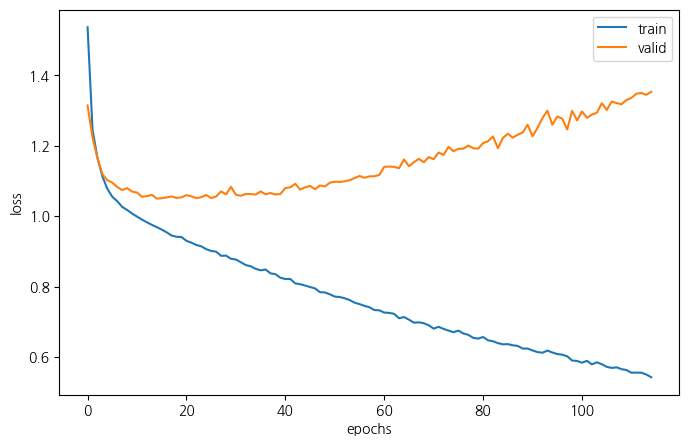

In [69]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=100)
os.makedirs("./model", exist_ok=True) # 디렉토리 자동 생성
filepath = "./model/witewine_loss_{val_loss:.4f}_epoch_{epoch:04d}__.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)
history = model.fit(rs_X_train, y_train,
                   epochs=1000,
                   batch_size=32,
                   validation_data=(rs_X_valid, y_valid),
                   callbacks=[early_stop, model_save])
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'valid'])
plt.show()

In [70]:
data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

# 데이터 증폭 후 분석
* 데이터 증폭 + 스케일러 사용시
* 데이터 증폭 후 스케일러로 스케일링

In [73]:
from imblearn.over_sampling import SMOTE

In [76]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [81]:
X = data.drop("quality", axis=1)
y = data['quality']

In [82]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=42)

In [83]:
print(y_train.nunique())
print(y_valid.nunique())
print(y_test.nunique())

7
7
7


In [103]:
smt = SMOTE(k_neighbors=2, random_state=42)
smt_X_train, smt_y_train = smt.fit_resample(X_train, y_train)
smt_X_train = pd.DataFrame(smt_X_train, columns=X_train.columns)
smt_y_train = pd.Series(smt_y_train)


/home/fintech/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [104]:
smt_X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.800000,0.210000,0.270000,2.100000,0.030000,26.000000,139.000000,0.990000,3.160000,0.610000,12.600000
1,6.700000,0.240000,0.320000,10.300000,0.079000,37.000000,122.000000,0.996620,3.020000,0.450000,8.800000
2,7.600000,0.270000,0.420000,2.600000,0.044000,29.000000,110.000000,0.991200,3.310000,0.510000,12.700000
3,7.000000,0.150000,0.280000,14.700000,0.051000,29.000000,149.000000,0.997920,2.960000,0.390000,9.000000
4,7.500000,0.170000,0.340000,1.400000,0.035000,13.000000,102.000000,0.991800,3.050000,0.740000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...
9221,7.390043,0.240664,0.364315,2.006638,0.031033,27.132757,138.137077,0.990542,3.282987,0.478009,12.513276
9222,6.751973,0.329605,0.350789,1.782368,0.024343,26.127625,93.510499,0.989848,3.397842,0.552250,12.551973
9223,6.773419,0.325316,0.359367,1.808102,0.024815,26.427860,94.711442,0.989875,3.396127,0.544101,12.573419
9224,6.630848,0.353830,0.302339,1.637017,0.021679,24.431866,86.727465,0.989690,3.407532,0.598278,12.430848


In [105]:
smt_y_train.value_counts()

quality
7    1318
5    1318
6    1318
4    1318
8    1318
3    1318
9    1318
Name: count, dtype: int64

In [99]:
rs = RobustScaler()
train_temp = rs.fit_transform(smt_X_train)
valid_temp = rs.transform(X_valid)
test_temp = rs.transform(X_test)
rs_X_train = pd.DataFrame(train_temp, columns=X_train.columns)
rs_X_valid = pd.DataFrame(valid_temp, columns=X_valid.columns, index= X_valid.index)
rs_X_test = pd.DataFrame(test_temp, columns=X_test.columns, index= X_test.index)

In [112]:
ot_smt_y_train = pd.get_dummies(smt_y_train)
ot_smt_y_train

,3,4,5,6,7,8,9
0,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
9221,False,False,False,False,False,False,True
9222,False,False,False,False,False,False,True
9223,False,False,False,False,False,False,True
9224,False,False,False,False,False,False,True


In [113]:
y_valid = pd.get_dummies(y_valid)
y_valid

,3,4,5,6,7,8,9
2794,False,False,True,False,False,False,False
2860,False,False,False,True,False,False,False
4885,False,False,False,True,False,False,False
2062,False,False,True,False,False,False,False
176,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
2985,False,False,False,False,True,False,False
4778,False,False,False,True,False,False,False
3841,False,False,False,True,False,False,False
3937,False,False,True,False,False,False,False


In [114]:
y_test = pd.get_dummies(y_test)
y_test                        

,3,4,5,6,7,8,9
2613,False,False,True,False,False,False,False
2361,False,False,True,False,False,False,False
4245,False,False,True,False,False,False,False
3947,False,False,False,False,True,False,False
3799,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
4502,False,False,False,True,False,False,False
3148,False,False,False,True,False,False,False
1562,False,False,False,False,True,False,False
37,False,False,False,True,False,False,False


In [119]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [120]:
n_class = ot_smt_y_train.shape[1]
model = Sequential()
model.add(Input(shape=(smt_X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(n_class, activation='softmax'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,495 (13.65 KB)

 Trainable params: 3,495 (13.65 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
import os

Epoch 1/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3837 - loss: 1.6567 - val_accuracy: 0.3194 - val_loss: 1.4945
Epoch 2/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5962 - loss: 0.9951 - val_accuracy: 0.3724 - val_loss: 1.3789
Epoch 3/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6472 - loss: 0.8303 - val_accuracy: 0.3990 - val_loss: 1.3009
Epoch 4/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6701 - loss: 0.7815 - val_accuracy: 0.4061 - val_loss: 1.3121
Epoch 5/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6967 - loss: 0.7308 - val_accuracy: 0.4061 - val_loss: 1.3321
Epoch 6/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7218 - loss: 0.6770 - val_accuracy: 0.4204 - val_loss: 1.3164
Epoch 7/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7256 - loss: 0.6788 - val_accuracy: 0.4173 - val_loss: 1.3205
Epoch 8/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7312 - loss: 0.6580 -

289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8735 - loss: 0.3072 - val_accuracy: 0.5235 - val_loss: 1.6168
Epoch 51/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8814 - loss: 0.3008 - val_accuracy: 0.5214 - val_loss: 1.6534
Epoch 52/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8763 - loss: 0.3051 - val_accuracy: 0.5153 - val_loss: 1.6696
Epoch 53/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8845 - loss: 0.2909 - val_accuracy: 0.5286 - val_loss: 1.6787
Epoch 54/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8810 - loss: 0.3043 - val_accuracy: 0.5204 - val_loss: 1.7044
Epoch 55/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8784 - loss: 0.3129 - val_accuracy: 0.5337 - val_loss: 1.6917
Epoch 56/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8861 - loss: 0.2870 - val_accuracy: 0.5316 - val_loss: 1.7250
Epoch 57/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8896 - loss: 0.2813 - val_ac

289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9143 - loss: 0.2237 - val_accuracy: 0.5306 - val_loss: 2.1069
Epoch 100/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9095 - loss: 0.2393 - val_accuracy: 0.5347 - val_loss: 2.1417
Epoch 101/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9131 - loss: 0.2182 - val_accuracy: 0.5327 - val_loss: 2.1337
Epoch 102/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9211 - loss: 0.2107 - val_accuracy: 0.5306 - val_loss: 2.2093
Epoch 103/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9158 - loss: 0.2234 - val_accuracy: 0.5439 - val_loss: 2.1284
Epoch 104/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9157 - loss: 0.2204 - val_accuracy: 0.5276 - val_loss: 2.1906
Epoch 105/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9188 - loss: 0.2119 - val_accuracy: 0.5439 - val_loss: 2.1662
Epoch 106/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9092 - loss: 0.2288 -

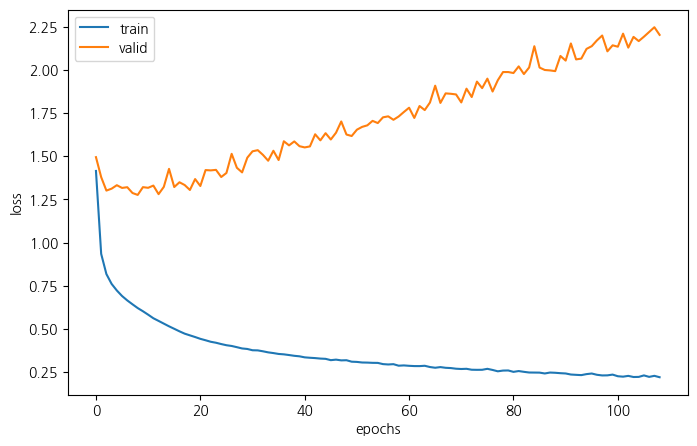

In [122]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=100)
os.makedirs("./model", exist_ok=True) # 디렉토리 자동 생성
filepath = "./model/witewine_loss_{val_loss:.4f}_epoch_{epoch:04d}__.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)
history = model.fit(rs_X_train, ot_smt_y_train,
                   epochs=1000,
                   batch_size=32,
                   validation_data=(rs_X_valid, y_valid),
                   callbacks=[early_stop, model_save])
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'valid'])
plt.show()

# 저장된 best 모델 불러와서 사용하기

In [123]:
rs_X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2613,-0.337800,0.772063,1.752696,1.045876,0.617084,-0.051244,0.242181,0.706733,-0.681818,-0.551977,-0.616379
2361,1.345167,-0.289524,1.208226,0.033782,0.617084,-0.819912,-0.386251,0.492741,0.272727,0.867392,-0.497429
4245,0.714054,0.675555,1.298971,1.555908,-0.136666,0.614934,-0.154723,1.105910,-0.818182,0.236561,-0.695680
3947,-0.863728,0.193016,-0.062203,-0.213265,0.153238,0.563689,0.275256,-0.684214,0.409091,-0.236561,0.692077
3799,0.082941,0.193016,-0.425183,-0.213265,0.153238,-0.461200,0.854075,-0.243885,-0.090909,0.788538,0.176625
...,...,...,...,...,...,...,...,...,...,...,...
4502,0.188127,-0.289524,-0.152948,-0.197326,0.617084,0.102489,0.506784,-0.297383,-0.363636,0.315415,0.176625
3148,-0.758542,-0.482539,0.300776,2.177509,-0.020704,0.358711,0.076804,1.361054,0.045455,-0.315415,-0.854281
1562,0.188127,0.579047,1.480461,-0.324834,-0.716474,-0.204978,0.010653,-0.585448,0.363636,-1.103953,0.493826
37,0.082941,0.482539,-0.062203,-0.372650,0.791027,0.409956,0.209106,-0.461992,-0.409091,-1.498222,0.097324


In [124]:
y_test

,3,4,5,6,7,8,9
2613,False,False,True,False,False,False,False
2361,False,False,True,False,False,False,False
4245,False,False,True,False,False,False,False
3947,False,False,False,False,True,False,False
3799,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
4502,False,False,False,True,False,False,False
3148,False,False,False,True,False,False,False
1562,False,False,False,False,True,False,False
37,False,False,False,True,False,False,False


In [125]:
from keras.models import load_model

In [126]:
best_model = load_model("./model/witewine_loss_1.0498_epoch_0015__.keras")
wine_pred = best_model.predict(rs_X_test)
wine_pred = pd.DataFrame(wine_pred, columns=y_test.columns)
wine_pred

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


,3,4,5,6,7,8,9
0,0.005210,0.040932,0.544092,0.392419,0.015751,0.001483,0.000112
1,0.014110,0.093955,0.582745,0.269633,0.035484,0.003276,0.000797
2,0.001543,0.014573,0.588162,0.378470,0.016182,0.001008,0.000062
3,0.002071,0.005453,0.043686,0.472956,0.392035,0.079861,0.003939
4,0.004852,0.032495,0.328076,0.566976,0.064145,0.002958,0.000498
...,...,...,...,...,...,...,...
975,0.003181,0.012379,0.188225,0.665499,0.119410,0.010109,0.001197
976,0.000135,0.001016,0.268560,0.691113,0.036949,0.002197,0.000030
977,0.004482,0.015824,0.052694,0.454572,0.373888,0.093061,0.005478
978,0.002669,0.012372,0.348089,0.552749,0.066256,0.015460,0.002403


In [127]:
best_model.evaluate(rs_X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5421 - loss: 1.0658


[1.0571353435516357, 0.5489795804023743]